individual instruction set stands for different movement types.

after evaluation we will get average accuracy and latency for the specific kind of motion

In [73]:
import pandas as pd
import os
import math
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from openai import OpenAI


In [74]:

def distance(x, y):
    return math.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2)


In [75]:

# Get the current working directory
WD = os.getcwd()

screen_width = 1080
screen_height = 720

x_divisions = 2
y_divisions = 2



instruction_df = pd.read_csv("D:\MAI\THWS\project\EyeGaze\insights\data\inst.csv")    # need to be configured later
observation_df = pd.read_csv("D:\MAI\THWS\project\EyeGaze\insights\data\obs.csv")


#print(instruction_df)
#print('\n')
#print(observation_df)

time_levels=3    # vgoof, good, ok, 
time_window = 3  # time_period of  a time level,  if the    
time_out = time_levels*time_window
max_accuracy = 2000

latency = list()
hit_accuracy = list()
hit_x = list()
hit_y = list()
hit_time = list()

accuracy_threshold = 1600  # maximum accuracy is 2000 that is if the instruction coordinates are followed exactly
movement_type = ""   # it could be fixation,saccades, smooth pursuit, vergence, microssaccades, nystagmus

for i in range(len(instruction_df['time'])):
    for j in range(i,len(observation_df['time'])):

        if(observation_df['time'][j]>instruction_df['time'][i]+time_out): 
                break
        
        t1 = instruction_df['time'][i]
        t2 = observation_df['time'][j]

        x1 = instruction_df['x_cordinate'][i]
        x2 = observation_df['x_cordinate'][j]
        x = [x1,x2]

        y1 = instruction_df['y_cordinate'][i]
        y2 = observation_df['y_cordinate'][j]
        y = [y1,y2]
        
        accuracy = max_accuracy - distance(x,y)  # maximum accuracy is defined to be 2000
        if(accuracy>accuracy_threshold):
                hit_accuracy.append(accuracy)
                latency.append(t2-t1)
                hit_x.append(x2)
                hit_y.append(y2)
                hit_time.append(t2)
                break
avg_accuracy = sum(hit_accuracy)/len(instruction_df['time'])
print(f"hit_accuracy: {hit_accuracy}")
print(f"avg_accuracy: {avg_accuracy}")    

avg_latency = sum(latency)/len(instruction_df['time'])
print(f"latency: {latency}")
print(f"avg_latency: {avg_latency}")    
print(f"{hit_x},{hit_y}")   
print(f"{hit_time}") 

    

          
    

hit_accuracy: [1605.310248422891, 1613.7928017242557, 1606.4063008634412, 1614.8506783077503, 1623.2932174754483, 1631.7337919384945, 1640.172263437072, 1648.6084804665884, 1657.0422766578947, 1666.9834838930658, 1675.45108226956, 1683.9177322278265, 1692.3833554568284, 1612.4822584706606, 1657.7573959893361, 1732.5303755564007, 1696.301135991588, 1627.6225033652006, 1635.8832604781812, 1607.3767709368178, 1661.8580179865269, 1670.3395686467666, 1678.8209222256219, 1687.302062686688, 1606.1104215646217, 1614.532751066968, 1622.9522576648947, 1614.5833423423423, 1623.0517276866758, 1631.519335649752, 1611.7603832682707, 1755.140856817639, 1701.0, 1708.828229390279, 1619.5528946095135, 1685.5210658883493, 1605.3862648107647, 1613.8394116432905, 1622.2911173933026, 1630.7412831089832, 1639.189800587622, 1732.1324954385097, 1746.1476807275537, 1719.0213531244767, 1681.6762654152224, 1651.791728989675, 1659.9338299683427, 1668.05874013615, 1676.1651655550318, 1684.2516825064622, 1692.316721

In [76]:
colormap = cm.viridis


color = [i/2000 for i in hit_accuracy]
color = [colormap(i) for i in color]

print(color)


[(np.float64(0.487026), np.float64(0.823929), np.float64(0.312321), np.float64(1.0)), (np.float64(0.496615), np.float64(0.826376), np.float64(0.306377), np.float64(1.0)), (np.float64(0.487026), np.float64(0.823929), np.float64(0.312321), np.float64(1.0)), (np.float64(0.496615), np.float64(0.826376), np.float64(0.306377), np.float64(1.0)), (np.float64(0.506271), np.float64(0.828786), np.float64(0.300362), np.float64(1.0)), (np.float64(0.515992), np.float64(0.831158), np.float64(0.294279), np.float64(1.0)), (np.float64(0.525776), np.float64(0.833491), np.float64(0.288127), np.float64(1.0)), (np.float64(0.545524), np.float64(0.838039), np.float64(0.275626), np.float64(1.0)), (np.float64(0.555484), np.float64(0.840254), np.float64(0.269281), np.float64(1.0)), (np.float64(0.565498), np.float64(0.84243), np.float64(0.262877), np.float64(1.0)), (np.float64(0.575563), np.float64(0.844566), np.float64(0.256415), np.float64(1.0)), (np.float64(0.585678), np.float64(0.846661), np.float64(0.249897)

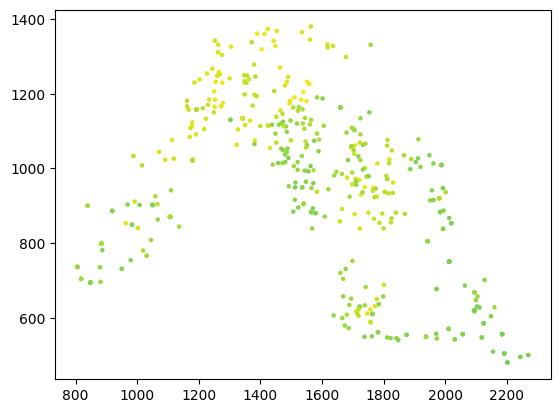

In [77]:

plt.scatter(hit_x,hit_y, s=5, c=color)
plt.show()

In [78]:
print(f"type: {movement_type}")
print(f"avg_accuracy: {avg_accuracy}")
print(f"avg_latency: {avg_latency}")



type: 
avg_accuracy: 1479.1826364446576
avg_latency: 3.483778558875219


In [79]:
client = OpenAI(api_key="sk-3495c83115d74946a3f08bc7bbe54ba3", base_url="https://api.deepseek.com")



response = client.chat.completions.create(
            model="deepseek-chat",
            messages=[
                {"role": "system", "content": "You are a helpful assistant"},
                {"role": "user", "content": f" {movement_type} {avg_accuracy} {avg_latency}  interpret the data to a commoner here the maximum accuracy value is {max_accuracy} and for latency the best is 0, the subject here is a child with ASD"}
                    
    
            
            ],
            stream=False
        )

print(response.choices[0].message.content)

Sure! Let's break down the numbers in a simple way:

1. **1479.1826364446576**: This number represents **accuracy**. Since the maximum accuracy value is 2000, this score of 1479.18 is pretty good! It means the child with ASD (Autism Spectrum Disorder) is performing well in whatever task or activity is being measured. They are achieving about 74% of the maximum possible accuracy (1479.18 ÷ 2000 = 0.7396, or 74%).

2. **3.483778558875219**: This number represents **latency**, which is the time it takes for the child to respond or complete a task. The best latency score is 0, meaning the faster the response, the better. A score of 3.48 suggests that the child is taking a little bit of time to respond or complete the task, but it’s not extremely slow. It’s just slightly above the ideal (0), so there’s room for improvement, but it’s not a cause for major concern.

### Summary:
- **Accuracy (1479.18)**: The child is doing well, achieving about 74% of the best possible performance.
- **Latenc